In [2]:
cd Documents/GitHub/La_Jara/Hysteresis

C:\Users\nicol\Documents\GitHub\La_Jara\Hysteresis


In [3]:
#Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

#Import Data
depth = pd.read_csv('Piezo2A-Summer2022.csv').iloc[2100:2145]
sonde = pd.read_csv('Sonde_Summer2022_Storm1.csv').iloc[0:69]

In [4]:
depth.rename(columns={'datetime': 'Time'}, inplace=True)
df = pd.merge(depth, sonde, on='Time', how='left')

In [5]:
from datetime import datetime as dt

date = []
for fecha in df['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)

new_dates = pd.DataFrame(date)
df['new_dates'] = date

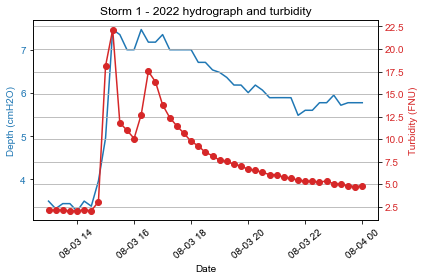

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cmH2O)', color=color)
ax1.plot(df['new_dates'], df['Pressure[cmH2O]'], color=color, linestyle="-")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
    
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(df['new_dates'], df['Turbidity'], "o-", color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Storm 1 - 2022 hydrograph and turbidity")
plt.grid()
sns.set_style("whitegrid")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Storm1_2022_turbidity.png", dpi=300)
plt.show()

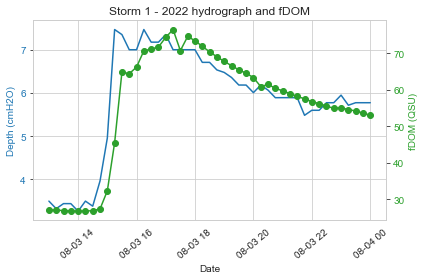

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cmH2O)', color=color)
ax1.plot(df['new_dates'], df['Pressure[cmH2O]'], color=color, linestyle="-")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
    
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(df['new_dates'], df['fDOM'], "o-", color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Storm 1 - 2022 hydrograph and fDOM")
plt.grid()
sns.set_style("whitegrid")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Storm1_2022_fDOM.png", dpi=300)
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_57520\3668696729.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc)


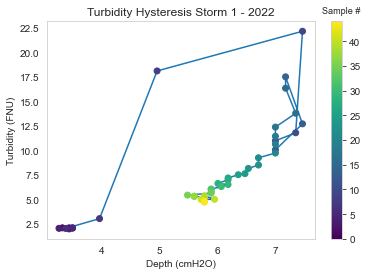

In [8]:
plt.plot(df['Pressure[cmH2O]'], df['Turbidity'], zorder=0)
cm = plt.cm.get_cmap('viridis')
sc = plt.scatter(df['Pressure[cmH2O]'], df['Turbidity'], c=range(45), cmap=cm, zorder=100)

plt.colorbar(sc)
plt.text(7.8,24,'Sample #', fontsize=9)

plt.xlabel("Depth (cmH2O)")
plt.ylabel("Turbidity (FNU)")
plt.title("Turbidity Hysteresis Storm 1 - 2022")

plt.grid()
sns.set_style("whitegrid")
plt.savefig("Turbidity_Hyst_Storm1_2022.png", dpi=300)
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_57520\2864178243.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc)


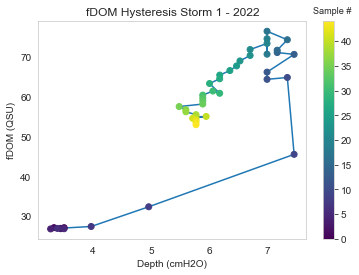

In [9]:
plt.plot(df['Pressure[cmH2O]'], df['fDOM'], zorder=0)
cm = plt.cm.get_cmap('viridis')
sc = plt.scatter(df['Pressure[cmH2O]'], df['fDOM'], c=range(45), cmap=cm, zorder=100)

plt.colorbar(sc)
plt.text(7.8,81,'Sample #', fontsize=9)

plt.xlabel("Depth (cmH2O)")
plt.ylabel("fDOM (QSU)")
plt.title("fDOM Hysteresis Storm 1 - 2022")

plt.grid()
sns.set_style("whitegrid")
plt.savefig("fDOMy_Hyst_Storm1_2022.png", dpi=300)
plt.show()